In [1]:
import pandas as pd

df = pd.read_csv('adults.csv')

In [2]:
# Q1
df.head(10)

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
0,200,0,Female,18,<=50k,A,40
1,100,-50,Male,19,>50k,B,42
2,100,100,Female,26,>50k,A,30
3,150,Not found,Female,20,<=50k,C,45
4,0,-1,Male,17,>50k,A,39
5,0,-1,Male,17,>50k,A-a,39


In [3]:
# Q2
df = pd.read_csv('adults.csv', na_values={'capital-loss': 'Not found'})
df = df.fillna({'capital-loss': 0})
df.head(10)

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
0,200,0.0,Female,18,<=50k,A,40
1,100,-50.0,Male,19,>50k,B,42
2,100,100.0,Female,26,>50k,A,30
3,150,0.0,Female,20,<=50k,C,45
4,0,-1.0,Male,17,>50k,A,39
5,0,-1.0,Male,17,>50k,A-a,39


In [7]:
# Q3
df['occupation'] = df['occupation'].str.replace('-', ' ', regex=False)
df

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
0,200,0.0,Female,18,<=50k,A,40
1,100,-50.0,Male,19,>50k,B,42
2,100,100.0,Female,26,>50k,A,30
3,150,0.0,Female,20,<=50k,C,45
4,0,-1.0,Male,17,>50k,A,39
5,0,-1.0,Male,17,>50k,A a,39


In [11]:
def replace_kuro(s):
    # return s.replace(' ', '->')
    lst = s.split(' ')
    res = ''
    for word in lst:
        res += word + '->'
    
    return res[:-2]

df['occupation'].apply(replace_kuro)

0       A
1       B
2       A
3       C
4       A
5    A->a
Name: occupation, dtype: object

In [23]:
# Q4

# df[df['capital-gain'] == 0].count()['capital-gain']
# df[df['capital-gain'] == 0]['capital-gain'].count()

total = len(df)
zero_gain = len(df[df['capital-gain'] == 0])
zero_loss = len(df[df['capital-loss'] == 0])

print(f'The number of zero gain: {zero_gain}')
print(f'The number of zero loss: {zero_loss}')

print(f'The percentage of zero capital gain is {zero_gain / total * 100:.2f}%')
print(f'The percentage of zero capital loss is {zero_loss / total * 100:.2f}%')


The number of zero gain: 2
The number of zero loss: 2
The percentage of zero capital gain is 33.33%
The percentage of zero capital loss is 33.33%


In [27]:
# Q5
#                 1. 篩選女性        2. 獲取年齡   3. 算平均
avg_women_age = df[df['sex'] == 'Female']['age'].mean()
print(f'The average age of Women is: {avg_women_age:.2f}')

The average age of Women is: 21.33


In [29]:
# Q6
df[df['salary'] == '>50k']['age'].mean()
df[df['salary'] == '<=50k']['age'].mean()

19.0

In [31]:
sal_grp = df.groupby('salary')['age'].mean()
sal_grp['>50k']

19.75

In [32]:
# Q7
above_50k =  df[df['salary'] == '>50k']
above_50k

,capital-gain,capital-loss,sex,age,salary,occupation,hours-per-week
1,100,-50.0,Male,19,>50k,B,42
2,100,100.0,Female,26,>50k,A,30
4,0,-1.0,Male,17,>50k,A,39
5,0,-1.0,Male,17,>50k,A a,39


In [42]:
above_50k.groupby('occupation').count()

,capital-gain,capital-loss,sex,age,salary,hours-per-week
occupation,,,,,,
A,2,2,2,2,2,2
A a,1,1,1,1,1,1
B,1,1,1,1,1,1


In [44]:
above_50k_df = above_50k.groupby('occupation').count().reset_index()
above_50k_df

,occupation,capital-gain,capital-loss,sex,age,salary,hours-per-week
0,A,2,2,2,2,2,2
1,A a,1,1,1,1,1,1
2,B,1,1,1,1,1,1


In [48]:
max_ppl = above_50k_df['capital-gain'].max() # 2
above_50k_df[above_50k_df['capital-gain'] == max_ppl].loc[0, 'occupation']

'A'

In [52]:
above_50k_df.sort_values(by='capital-gain', ascending=False).head(1)['occupation']

0    A
Name: occupation, dtype: object

<Axes: >

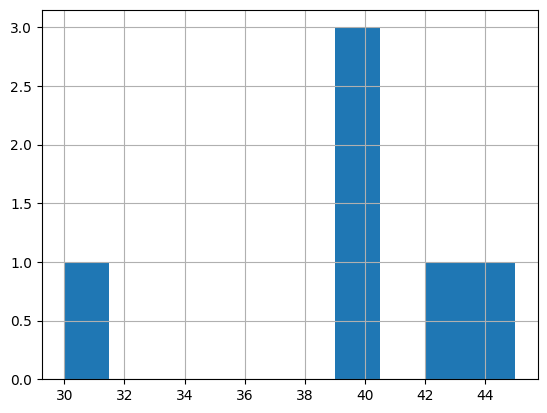

In [53]:
# Q8
df['hours-per-week'].hist()